In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/house-prices-advanced-regression-techniques/sample_submission.csv
/kaggle/input/house-prices-advanced-regression-techniques/data_description.txt
/kaggle/input/house-prices-advanced-regression-techniques/train.csv
/kaggle/input/house-prices-advanced-regression-techniques/test.csv


# Import all the necessary libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import sklearn

# Get the train and test data

In [3]:
df_train=pd.read_csv("/kaggle/input/house-prices-advanced-regression-techniques/train.csv")
df_train.head()
df_test=pd.read_csv("/kaggle/input/house-prices-advanced-regression-techniques/test.csv")
test_id=df_test['Id']

In [4]:
df_train.shape

(1460, 81)

In [5]:
df_test.shape

(1459, 80)

In [6]:
df_train.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

# Cleaning Null Values

In [7]:
null=df_train.isnull().sum()
null=null[null>75]
null

LotFrontage      259
Alley           1369
FireplaceQu      690
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
PoolQC          1453
Fence           1179
MiscFeature     1406
dtype: int64

In [8]:
col=null.index
col=np.array(col)
col

array(['LotFrontage', 'Alley', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageQual', 'GarageCond', 'PoolQC', 'Fence',
       'MiscFeature'], dtype=object)

In [9]:
df_train=df_train.drop(columns=col,axis=1)
df_train

,Id,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,2,2008,WD,Normal,208500
1,2,20,RL,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,5,2007,WD,Normal,181500
2,3,60,RL,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,9,2008,WD,Normal,223500
3,4,70,RL,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,5,60,RL,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,7917,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,8,2007,WD,Normal,175000
1456,1457,20,RL,13175,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,2,2010,WD,Normal,210000
1457,1458,70,RL,9042,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,9717,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,112,0,0,0,0,4,2010,WD,Normal,142125


In [10]:
null1=df_test.isnull().sum()
null1=null1[null1>300]
null1

Alley          1352
FireplaceQu     730
PoolQC         1456
Fence          1169
MiscFeature    1408
dtype: int64

In [11]:
col1=null1.index
col1=np.array(col1)
col1

array(['Alley', 'FireplaceQu', 'PoolQC', 'Fence', 'MiscFeature'],
      dtype=object)

In [12]:
df_test=df_test.drop(columns=col,axis=1)
df_test

,Id,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,11622,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,120,0,0,6,2010,WD,Normal
1,1462,20,RL,14267,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,36,0,0,0,0,12500,6,2010,WD,Normal
2,1463,60,RL,13830,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,34,0,0,0,0,0,3,2010,WD,Normal
3,1464,60,RL,9978,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,36,0,0,0,0,0,6,2010,WD,Normal
4,1465,120,RL,5005,Pave,IR1,HLS,AllPub,Inside,Gtl,...,82,0,0,144,0,0,1,2010,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,2915,160,RM,1936,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,0,6,2006,WD,Normal
1455,2916,160,RM,1894,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,24,0,0,0,0,0,4,2006,WD,Abnorml
1456,2917,20,RL,20000,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,0,9,2006,WD,Abnorml
1457,2918,85,RL,10441,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,32,0,0,0,0,700,7,2006,WD,Normal


# Removing zeros

In [13]:
#replacing null values 
zero1=df_train.replace(0,np.nan)
zero1=zero1.isnull().sum()
zero1=zero1[zero1>300]
zero1

MasVnrArea        869
BsmtFinSF1        467
BsmtFinSF2       1293
2ndFlrSF          829
LowQualFinSF     1434
BsmtFullBath      856
BsmtHalfBath     1378
HalfBath          913
Fireplaces        690
WoodDeckSF        761
OpenPorchSF       656
EnclosedPorch    1252
3SsnPorch        1436
ScreenPorch      1344
PoolArea         1453
MiscVal          1408
dtype: int64

In [14]:
zero2=df_test.replace(0,np.nan)
zero2=zero2.isnull().sum()
zero2=zero2[zero2>300]
zero2

MasVnrArea        892
BsmtFinSF1        463
BsmtFinSF2       1279
2ndFlrSF          839
LowQualFinSF     1445
BsmtFullBath      851
BsmtHalfBath     1366
HalfBath          921
Fireplaces        730
WoodDeckSF        762
OpenPorchSF       642
EnclosedPorch    1208
3SsnPorch        1446
ScreenPorch      1319
PoolArea         1453
MiscVal          1408
dtype: int64

In [15]:
a=zero1.index
np.array(a)

array(['MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', '2ndFlrSF',
       'LowQualFinSF', 'BsmtFullBath', 'BsmtHalfBath', 'HalfBath',
       'Fireplaces', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch',
       '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal'], dtype=object)

In [16]:
df_train=df_train.drop(columns=a,axis=1)
df_train

,Id,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,TotRmsAbvGrd,Functional,GarageCars,GarageArea,PavedDrive,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,8,Typ,2,548,Y,2,2008,WD,Normal,208500
1,2,20,RL,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,...,6,Typ,2,460,Y,5,2007,WD,Normal,181500
2,3,60,RL,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,6,Typ,2,608,Y,9,2008,WD,Normal,223500
3,4,70,RL,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,7,Typ,3,642,Y,2,2006,WD,Abnorml,140000
4,5,60,RL,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,...,9,Typ,3,836,Y,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,7917,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,7,Typ,2,460,Y,8,2007,WD,Normal,175000
1456,1457,20,RL,13175,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,7,Min1,2,500,Y,2,2010,WD,Normal,210000
1457,1458,70,RL,9042,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,9,Typ,1,252,Y,5,2010,WD,Normal,266500
1458,1459,20,RL,9717,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,5,Typ,1,240,Y,4,2010,WD,Normal,142125


In [17]:
a1=zero2.index
np.array(a1)

array(['MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', '2ndFlrSF',
       'LowQualFinSF', 'BsmtFullBath', 'BsmtHalfBath', 'HalfBath',
       'Fireplaces', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch',
       '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal'], dtype=object)

In [18]:
df_test=df_test.drop(columns=a1,axis=1)
df_test

,Id,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,KitchenQual,TotRmsAbvGrd,Functional,GarageCars,GarageArea,PavedDrive,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,11622,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,TA,5,Typ,1.0,730.0,Y,6,2010,WD,Normal
1,1462,20,RL,14267,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,Gd,6,Typ,1.0,312.0,Y,6,2010,WD,Normal
2,1463,60,RL,13830,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,TA,6,Typ,2.0,482.0,Y,3,2010,WD,Normal
3,1464,60,RL,9978,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,Gd,7,Typ,2.0,470.0,Y,6,2010,WD,Normal
4,1465,120,RL,5005,Pave,IR1,HLS,AllPub,Inside,Gtl,...,Gd,5,Typ,2.0,506.0,Y,1,2010,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,2915,160,RM,1936,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,TA,5,Typ,0.0,0.0,Y,6,2006,WD,Normal
1455,2916,160,RM,1894,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,TA,6,Typ,1.0,286.0,Y,4,2006,WD,Abnorml
1456,2917,20,RL,20000,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,TA,7,Typ,2.0,576.0,Y,9,2006,WD,Abnorml
1457,2918,85,RL,10441,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,TA,6,Typ,0.0,0.0,Y,7,2006,WD,Normal


# **Feature Selection**

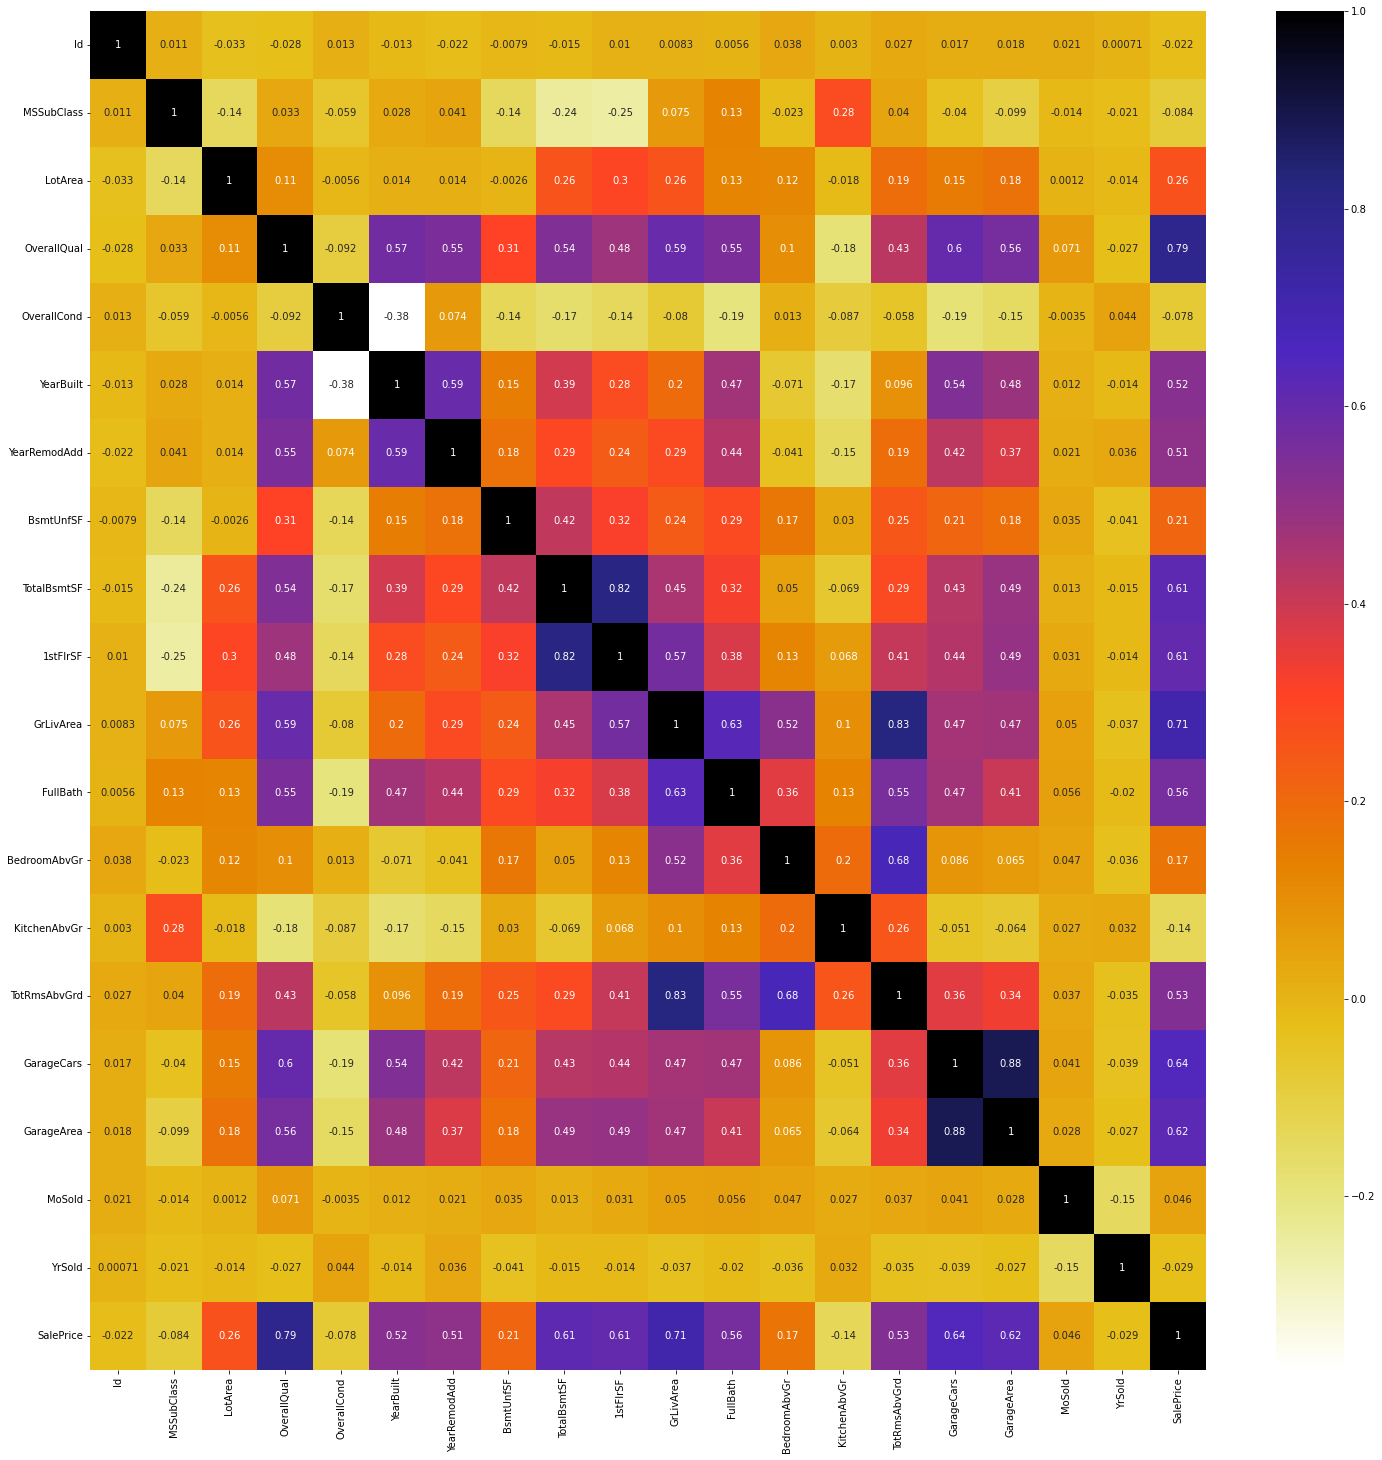

In [19]:
import seaborn as sns
cor=df_train.corr()
plt.figure(figsize=(25,25))
sns.heatmap(cor,annot=True,cmap=plt.cm.CMRmap_r)
plt.show()

In [20]:
# Set a threshold for the correlation value
threshold = 0.5

# Get the list of highly correlated features with the target variable
correlated_features = cor.index[abs(cor["SalePrice"]) > threshold]

# Create a new dataframe with only the highly correlated features
df_train= df_train[correlated_features]
df_train

,OverallQual,YearBuilt,YearRemodAdd,TotalBsmtSF,1stFlrSF,GrLivArea,FullBath,TotRmsAbvGrd,GarageCars,GarageArea,SalePrice
0,7,2003,2003,856,856,1710,2,8,2,548,208500
1,6,1976,1976,1262,1262,1262,2,6,2,460,181500
2,7,2001,2002,920,920,1786,2,6,2,608,223500
3,7,1915,1970,756,961,1717,1,7,3,642,140000
4,8,2000,2000,1145,1145,2198,2,9,3,836,250000
...,...,...,...,...,...,...,...,...,...,...,...
1455,6,1999,2000,953,953,1647,2,7,2,460,175000
1456,6,1978,1988,1542,2073,2073,2,7,2,500,210000
1457,7,1941,2006,1152,1188,2340,2,9,1,252,266500
1458,5,1950,1996,1078,1078,1078,1,5,1,240,142125


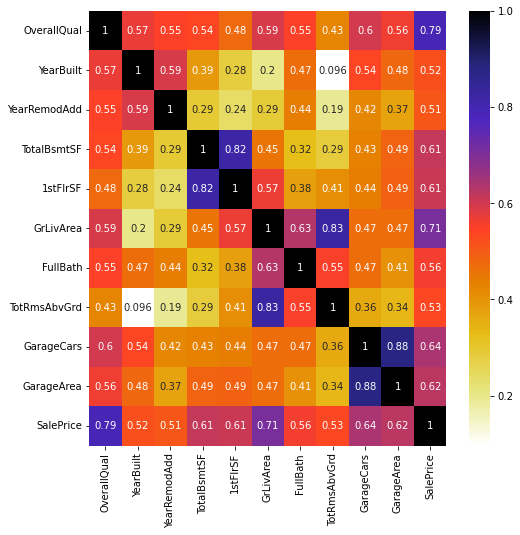

In [21]:
plt.figure(figsize=(8,8))
cor=df_train.corr()
sns.heatmap(cor,annot=True,cmap=plt.cm.CMRmap_r)
plt.show()

In [22]:
df_train.columns

Index(['OverallQual', 'YearBuilt', 'YearRemodAdd', 'TotalBsmtSF', '1stFlrSF',
       'GrLivArea', 'FullBath', 'TotRmsAbvGrd', 'GarageCars', 'GarageArea',
       'SalePrice'],
      dtype='object')

In [23]:
#choosing features
features=['OverallQual', 'YearBuilt', 'TotalBsmtSF', 'GrLivArea', 'FullBath',
       'GarageArea']

# Determinig x and y

In [24]:
x = df_train[features].values
x.shape

(1460, 6)

In [25]:
y=df_train['SalePrice']
y.shape

(1460,)

In [26]:
x_pred = df_test[features].values
x_pred.shape

(1459, 6)

In [27]:
import numpy as np
from sklearn.impute import SimpleImputer

# Check for missing and infinite values
print(np.isnan(x_pred).any())
print(np.isinf(x_pred).any())

# Impute missing values with mean imputation
imp = SimpleImputer(strategy='mean')
x_pred = imp.fit_transform(x_pred)



True
False


# **Splitting the train data**

In [28]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

# **Training the model**

# 1. LinearRegression

In [29]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score
reg=LinearRegression()
reg.fit(x_train,y_train)
y_pred = reg.predict(x_test)

In [30]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test, y_pred)
mse=np.sqrt(mse)
print("Mean Squared Error: ", mse)

Mean Squared Error:  50441.673959522865


In [31]:
#predicting for test data
pred=reg.predict(x_pred)

In [32]:
print(pred)

[129991.01697692 169632.01465938 169468.95085542 ... 154617.55961531
 110796.31756764 238137.92244858]


# 2. GradientBoostingRegressor

In [33]:
from sklearn.ensemble import GradientBoostingRegressor
gb_model = GradientBoostingRegressor(loss='squared_error', learning_rate=0.1, n_estimators=100, subsample=1.0, 
                                      criterion='friedman_mse', min_samples_split=2, min_samples_leaf=1, 
                                      max_depth=3, random_state=42)

# Fit the model to the training data
gb_model.fit(x_train, y_train)

# Make predictions on the test set
y_pred = gb_model.predict(x_test)


In [34]:
# Calculate the mean squared error
mse = mean_squared_error(y_test, y_pred)
mse=np.sqrt(mse)
print(f"Mean Squared Error: {mse}")

Mean Squared Error: 29725.087278603274


In [35]:
#predicting for test data
pred1=gb_model.predict(x_pred)

In [36]:
print(pred1)

[133553.00113693 151946.74519436 155493.00785631 ... 148778.09473656
 117177.06444406 231394.83403296]


# 3. LASSO Regression

In [37]:
from sklearn.linear_model import Lasso
# Create an instance of Lasso Regression implementation
#
lasso = Lasso(alpha=1.0)
#
# Fit the Lasso model
#
lasso.fit(x_train, y_train)
y_pred = lasso.predict(x_test)

In [38]:
# Calculate the mean squared error
mse = mean_squared_error(y_test, y_pred)
mse=np.sqrt(mse)
print(f"Mean Squared Error: {mse}")

Mean Squared Error: 50441.58860742655


In [39]:
lasso.score(x_test, y_test), lasso.score(x_train, y_train)

(0.6315654301058964, 0.7990733868200067)

In [40]:
#predicting for test data
pred2=lasso.predict(x_pred)

In [41]:
print(pred2)

[129990.88818415 169628.89488701 169472.68357111 ... 154616.5968691
 110793.80601244 238137.84342443]


# **Submission**

In [42]:
sub = pd.DataFrame()    #create an empty dataframe
sub['Id'] = test_id     #create a column with the test Id's
sub['SalePrice'] = pred1  #create a column with the test predictions
sub.to_csv('submission.csv',index=False) #submission file
sub.head()

,Id,SalePrice
0,1461,133553.001137
1,1462,151946.745194
2,1463,155493.007856
3,1464,172484.041248
4,1465,217841.384635
